In [1]:
    %matplotlib inline
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    import pandas as pd
    import numpy as np

In [4]:
#Loading in the data
df = pd.read_csv('conventional_power_plants_EU.csv')
df.head()

,name,company,street,postcode,city,country,capacity,energy_source,technology,chp,commissioned,lat,lon
0,AL-1,NUON,Marketkant 12-10,1341AK,Almere,NL,62.0,Natural gas,NaN,NaN,NaN,52.38811,5.21540
1,AL-2,NUON,Markerkant 12-10,1341AK,Almere,NL,55.0,Natural gas,NaN,NaN,NaN,52.38811,5.21540
2,Amercentrale (A8),ESSENT ENERGY TRADING B.V.,Amerweg .,4931NC,Geertruidenberg,NL,645.0,Hard coal,Steam turbine,NaN,NaN,51.70838,4.84381
3,Amercentrale (A9),ESSENT ENERGY TRADING B.V.,Amerweg .,4931NC,Geertruidenberg,NL,643.0,Hard coal,Steam turbine,NaN,NaN,51.70838,4.84381
4,Amylum,AMYLUM NEDERLAND B.V.,Lagedijk 5,1541KA,Koog aan de Zaan,NL,7.0,Natural gas,NaN,NaN,NaN,52.46552,4.81361


In [23]:
#Part A:
#To figure out the number of facilities associated with each energy source, we first should identify all the energy sources:
subdf = df['energy_source']
esources = subdf.value_counts()
subdf.value_counts()

Hydro                                  3395
Natural gas                            1088
Other or unspecified energy sources     435
Oil                                     288
Biomass and biogas                      232
Hard coal                               126
Nuclear                                 102
Fossil fuels                             95
Lignite                                  44
Non-renewable waste                      32
Other bioenergy and renewable waste      13
Mixed fossil fuels                       12
Other fossil fuels                        5
Name: energy_source, dtype: int64

In [25]:
esources.index #This gives us the list of all of the unique types of energy sources

Index(['Hydro', 'Natural gas', 'Other or unspecified energy sources', 'Oil',
       'Biomass and biogas', 'Hard coal', 'Nuclear', 'Fossil fuels', 'Lignite',
       'Non-renewable waste', 'Other bioenergy and renewable waste',
       'Mixed fossil fuels', 'Other fossil fuels'],
      dtype='object')

In [92]:
#Creating a loop that goes through all the energy sources and identifies the number of unique names (unique facilities)
unique_names = []
for index, source in enumerate(esources.index):
    loopdf = df[df['energy_source'] == source] 
    unique_names.append(len(loopdf.index))

#We then report unique facilities in a new dataframe
uniquedf = pd.DataFrame(unique_names)
uniquedf.index = esources.index
uniquedf.columns = ['Unique Facilities']
uniquedf


,Unique Facilities
Hydro,3395
Natural gas,1088
Other or unspecified energy sources,435
Oil,288
Biomass and biogas,232
Hard coal,126
Nuclear,102
Fossil fuels,95
Lignite,44
Non-renewable waste,32


In [72]:
len(df.index)

5867

In [43]:
df['name'].value_counts #This shows that each name appears once since this has the same length as df.index

<bound method IndexOpsMixin.value_counts of 0                                     AL-1
1                                     AL-2
2                        Amercentrale (A8)
3                        Amercentrale (A9)
4                                   Amylum
                       ...                
5862    Nordjylland Power Station (Unit 3)
5863                              Østkraft
5864        Skærbæk Power Station (Unit 3)
5865      Studstrup Power Station (Unit 3)
5866      Studstrup Power Station (Unit 5)
Name: name, Length: 5867, dtype: object>

Text(0.5, 1.0, 'Number of facilities for each energy source')

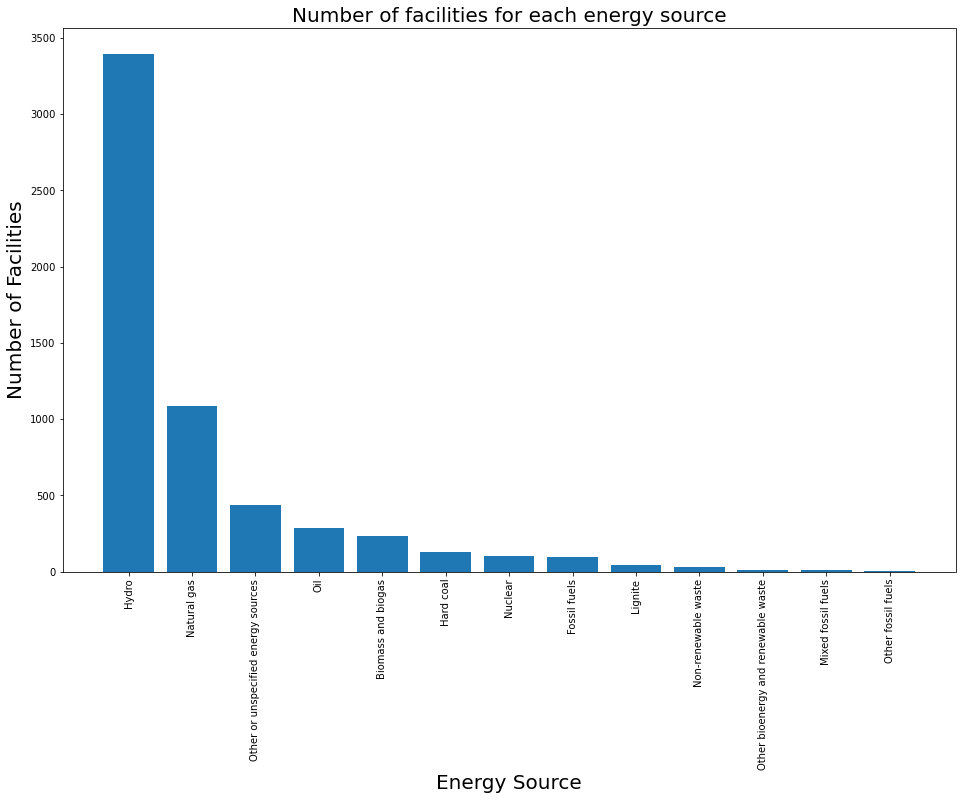

In [90]:
#Creating a bar chart to show the results of part A better
plt.figure(figsize=(16,10))    
plt.bar(esources.index,unique_names)
plt.xlabel("Energy Source", fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel("Number of Facilities", fontsize=20)
plt.title("Number of facilities for each energy source", fontsize=20)
    
    #It is also verified that all these numeric outputs sum to the length of df.index, which is 5867

Text(0.5, 1.0, 'Energy Source Facility Proportions in Europe')

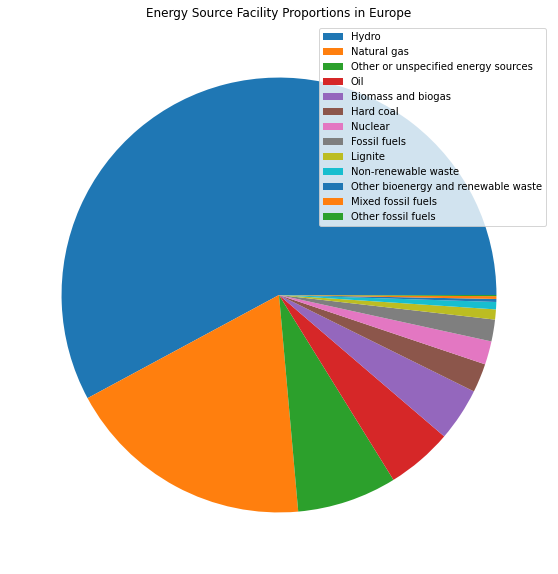

In [144]:
#Part B: Using a pie chart to show the proportion of energy source facilities of each type
plt.figure(figsize=(16,10))    
plt.pie(unique_names)
plt.legend(esources.index)
plt.title('Energy Source Facility Proportions in Europe')

In [103]:
#The plot above tells us that hydro is the most common source of energyif we base our results on number of facilities 
# and not MW produced. This also tells us that other fossil fuels has the lowest % of facilities (least common).

In [104]:
#Part C: 
#First, we locate the facilities that have a CHP unit
df['chp'].value_counts()

Yes    132
yes     30
Name: chp, dtype: int64

In [105]:
#Thus, there are 132 + 30 = 162 facilities with a CHP unit

In [114]:
#We identify which countries are associated with the 'yes' or 'Yes' results
out = df[df['chp'] == ('Yes')] 
outto = df[df['chp'] == ('yes')] 
out['country'].value_counts()

FI    132
Name: country, dtype: int64

In [115]:
outto['country'].value_counts()

AT    16
SI     8
SE     6
Name: country, dtype: int64

In [116]:
#Looking at these results, we see that Finland owns by far the most CHP units

In [122]:
#Part D:
#To create a plot of installed capacities by technology type, we first need to create a new df with groupby
techdf = df.groupby("technology")["capacity"]
techdf.sum() #This prints out the total installed capacities for each technology

technology
Combined cycle                         36995.6600
Combustion engine                         43.6350
Gas turbine                             2195.0915
Pumped storage                         15513.9900
Pumped storage with natural inflow       533.0000
Reservoir                              35628.7500
Run-of-river                           15861.6660
Steam turbine                         118309.9800
Name: capacity, dtype: float64

Text(0.5, 1.0, 'Technologies Used')

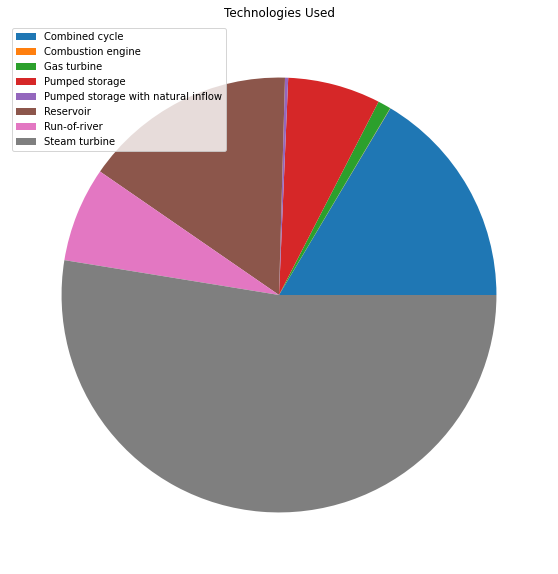

In [143]:
#To show the ratio of installed capacities for each technology, we use a pie chart
plt.figure(figsize=(16,10)) 
techs = techdf.sum()
plt.pie(techdf.sum().values)
plt.legend(techs.index)
plt.title('Technologies Used')
#This shows that steam turbines are the most common technology, and pumped storage with natural inflow hydropower
#is the least common (alongside combustion engines)

In [314]:
#Part E:
#First, create a new dataframe of names where the capacity is equal to 0:
cap0df = df[df['capacity'] == 0]
#cap0df.index gives us a list of indices within the df that correspond to capacity of 0
newdf = df.drop(cap0df.index)
newdf #Notice it is not as long now

,name,company,street,postcode,city,country,capacity,energy_source,technology,chp,commissioned,lat,lon
0,AL-1,NUON,Marketkant 12-10,1341AK,Almere,NL,62.0,Natural gas,NaN,NaN,NaN,52.38811,5.21540
1,AL-2,NUON,Markerkant 12-10,1341AK,Almere,NL,55.0,Natural gas,NaN,NaN,NaN,52.38811,5.21540
2,Amercentrale (A8),ESSENT ENERGY TRADING B.V.,Amerweg .,4931NC,Geertruidenberg,NL,645.0,Hard coal,Steam turbine,NaN,NaN,51.70838,4.84381
3,Amercentrale (A9),ESSENT ENERGY TRADING B.V.,Amerweg .,4931NC,Geertruidenberg,NL,643.0,Hard coal,Steam turbine,NaN,NaN,51.70838,4.84381
4,Amylum,AMYLUM NEDERLAND B.V.,Lagedijk 5,1541KA,Koog aan de Zaan,NL,7.0,Natural gas,NaN,NaN,NaN,52.46552,4.81361
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5862,Nordjylland Power Station (Unit 3),NaN,NaN,NaN,NaN,DK,410.0,Hard coal,Steam turbine,NaN,1998.0,57.07260,10.04252
5863,Østkraft,NaN,NaN,NaN,NaN,DK,90.0,Other or unspecified energy sources,NaN,NaN,2014.0,55.09371,14.69715
5864,Skærbæk Power Station (Unit 3),NaN,NaN,NaN,NaN,DK,430.0,Natural gas,NaN,NaN,1997.0,55.51132,9.61331
5865,Studstrup Power Station (Unit 3),NaN,NaN,NaN,NaN,DK,380.0,Hard coal,Steam turbine,NaN,1984.0,56.24895,10.34725


Text(0, 0.5, 'Frequency of result')

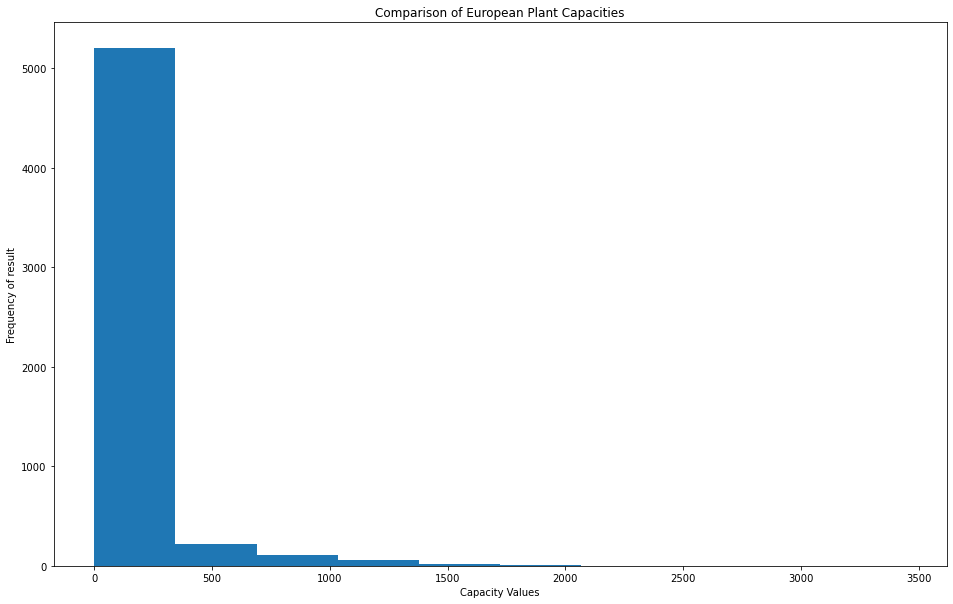

In [142]:
#Creating a histogram for the distribution of capacity:
plt.figure(figsize=(16,10))
plt.hist(newdf['capacity'])
plt.title('Comparison of European Plant Capacities')
plt.xlabel('Capacity Values')
plt.ylabel('Frequency of result')

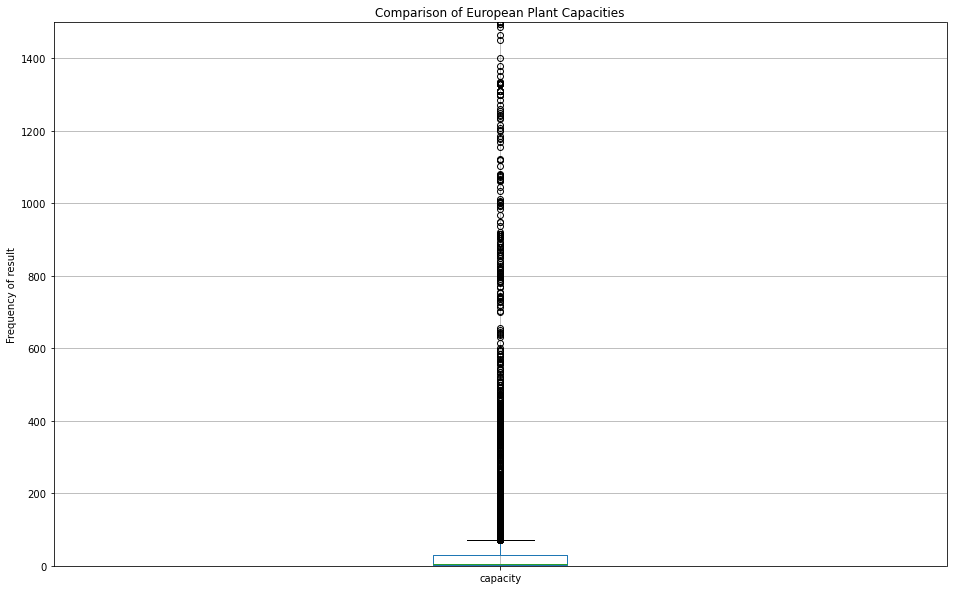

In [171]:
#Creating a boxplot 
plt.figure(figsize=(16,10))
plt.title('Comparison of European Plant Capacities')
plt.ylabel('Frequency of result')
newdf.boxplot('capacity')
plt.ylim(0,1500) #To make the boxplot more informative, manually restrict the y axis, otherwise outliers make the box hard to see
plt.show()



In [277]:
#The above boxplot tells us a number of statistics. For example, the boxplot shows that while there are no lower outliers
#for capacity, there are many outliers that have capacities greater than the 75% percentile by a large margin.
#The box in the boxplot tells us the interquartile range of the data (Q75-Q25) as well as the 25th and 75th quartiles
#and the placement of the median (Q50) within the middle of the box. This visual tells us that the vast majority of
#faciliteis have quite low capacities, which is shown by the low boxplot. However, there are a number of facilities with
#very high capacities in comparison to the median and middle 50% of the data. The box in the boxplot also gives an
#indication of the scale of the outliers compared to more "normal" data. we can see that in this case the outliers are 
#much larger than the "normal" data. 

#This boxplot also reveals a very high degree of skewness in the data since the data is quite asymmetrical, with the box
#far to one end of the plot. While the boxplot doesn't automatically give us data that would help us find actual values
#for mean and variance, it does allow us to make some educated guesses. We can assume the mean is close to 0 given that
#the placement of the median is low. Additionally, we can assume that the variance is fairly high, given the fact that 
#there are so many outliers so far away from the median and mean.

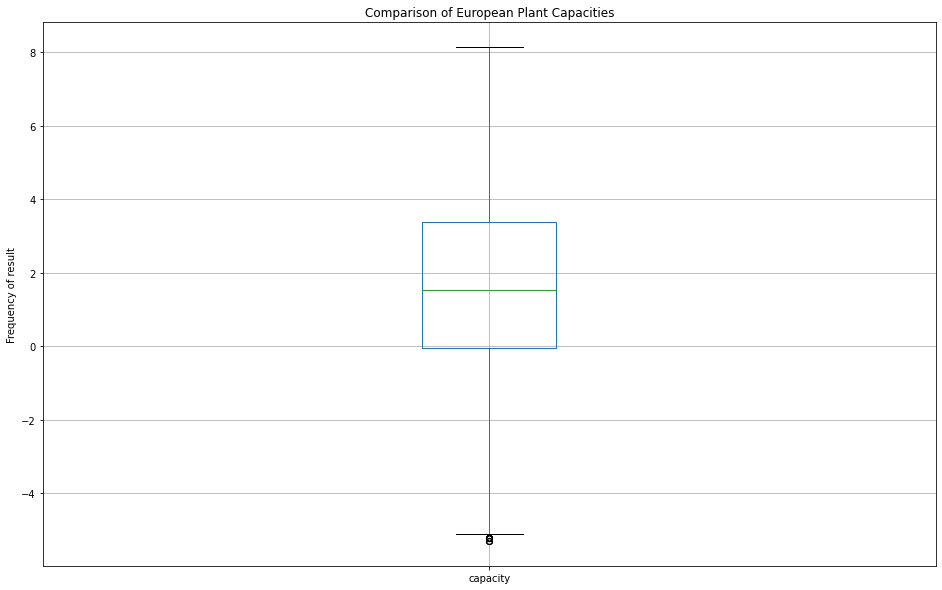

In [173]:
#Plotting the boxplot again but with a log scale
#We create a copy of the dataframe we were working with and adjust this capacity to be a log scale
newnewdf = newdf.copy()
newnewdf['capacity'] = np.log(newnewdf['capacity'])

plt.figure(figsize=(16,10))
plt.title('Comparison of European Plant Capacities')
plt.ylabel('Frequency of result')
newnewdf.boxplot('capacity')
plt.show()



In [182]:
#Part F:
#Creating new dataframe with only the two specified columns
comcapdf = pd.DataFrame(newdf['commissioned'])
comcapdf.index = range(0,len(newdf.index))
comcapdf['capacity'] = newdf['capacity']
comcapdf


,commissioned,capacity
0,NaN,62.00
1,NaN,55.00
2,NaN,645.00
3,NaN,643.00
4,NaN,7.00
...,...,...
5819,1998.0,16.00
5820,2014.0,44.50
5821,1997.0,24.00
5822,1984.0,0.14


Text(0.5, 1.0, 'Total Comissioned Capacities vs Year')

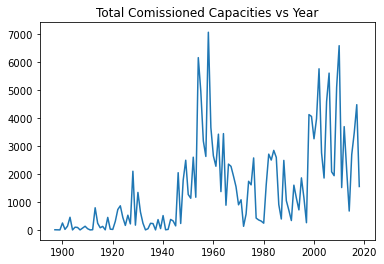

In [206]:
#To find total commissioned capacities for each year, we have to groupby commissioned year
com_df = comcapdf.groupby("commissioned")["capacity"].sum()
com_df #This now gives us total commissioned capacities for each year
plt.plot(com_df.index,com_df.values)
plt.title('Total Comissioned Capacities vs Year')

In [201]:
#To find the year with the highest commissioned capacity, use the idxmax() method
com_df.idxmax() #Thus 1958 has the highest commissioned capacity in total

1958.0

In [209]:
#Part G:
#First, we have to create the dataframe with the mean of capacity sizes grouped by country
cap_count_df = newdf.groupby("country")["capacity"].sum()
cap_count_df

country
AT     14313.12000
CH     20104.75000
CZ      5700.00000
DK      4405.00000
ES     75221.68744
FI     15400.59000
FR     90054.50000
IT     72729.99400
NL     19264.00000
NO     12873.00000
PL     26130.00000
SE     17438.00000
SI      3353.81300
SK      5315.15000
UK     65725.69600
Name: capacity, dtype: float64

In [210]:
#We use idxmax() and idxmin() to find the countreis with the highest and lowest capacities
cap_count_df.idxmin() # This tells us that slovenia has the lowest total capacity out of the listed countries

'SI'

In [211]:
cap_count_df.idxmax() #This tells us that France has the highest total capacity out of the listed countries

'FR'

Text(0.5, 1.0, 'Comparison of Total Capacities')

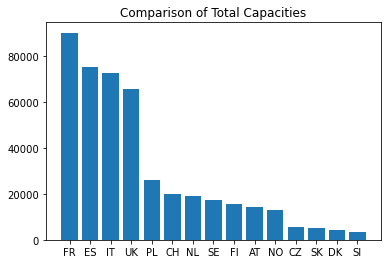

In [312]:
cap_count_df = cap_count_df.sort_values(ascending=False)
plt.bar(cap_count_df.index,cap_count_df.values)
plt.title('Comparison of Total Capacities')

In [308]:
#Part H:
#First, we group by mean instead of sum
cap_count_meandf = newdf.groupby("country")["capacity"].mean()
cap_count_meandf

country
AT     0.024722
CH     0.008961
CZ     0.087056
DK     0.058103
ES     0.006350
FI     0.014748
FR     0.173065
IT     0.152938
NL     0.087346
NO     0.046118
PL     0.070865
SE     0.097313
SI     0.009930
SK     0.017934
UK     0.080137
Name: capacity, dtype: float64

In [309]:
cap_count_meandf.idxmin() #This tells us that spain has the smallest average facility sizes (capacity-wise)

'ES'

Text(0.5, 1.0, 'Comparison of Mean Capacities')

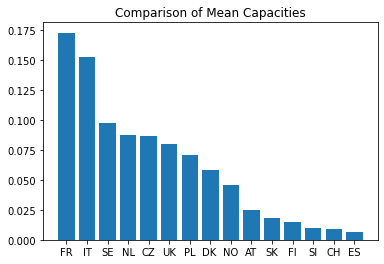

In [311]:
cap_count_meandf.idxmax() #This tells us that France has the largest average power plant sizes (capacity-wise)
cap_count_meandf = cap_count_meandf.sort_values(ascending=False)
plt.bar(cap_count_meandf.index,cap_count_meandf.values)
plt.title('Comparison of Mean Capacities')

In [298]:
#Part I:
#To figure out which countries have the most nuclear energy, we have to create a new column and then do groupby of sum
#To create a new column, we first loop through the energy_source column and identify which facilities are nuclear
nuke = []
for index, source in enumerate(newdf['energy_source']):
    if source == 'Nuclear':
        nuke.append(1)
    else:
        nuke.append(0)

#We can then add the nuke facilities (1 = yes, 0 = no) as a new column and count to get the amount of facilities in each 
#country
newdf['nuclear'] = nuke    
nukedf = newdf.groupby("country")["nuclear"].sum()
nukedf

country
AT      0
CH      5
CZ      3
DK      0
ES      8
FI      4
FR     58
IT      0
NL      1
NO      0
PL      0
SE     10
SI      1
SK      4
UK      8
Name: nuclear, dtype: int64

In [236]:
#Identifying countries with highest and lowest amounts of nuclear powerplants:
print(f'{nukedf.idxmax()} has the highest amount of nuclear powerplants')
print(f'{nukedf.idxmin()} has the lowest amount of nuclear powerplants') #AT is austria

FR has the highest amount of nuclear powerplants
AT has the lowest amount of nuclear powerplants


Text(0.5, 1.0, 'Number of Nuclear Facilities By Country')

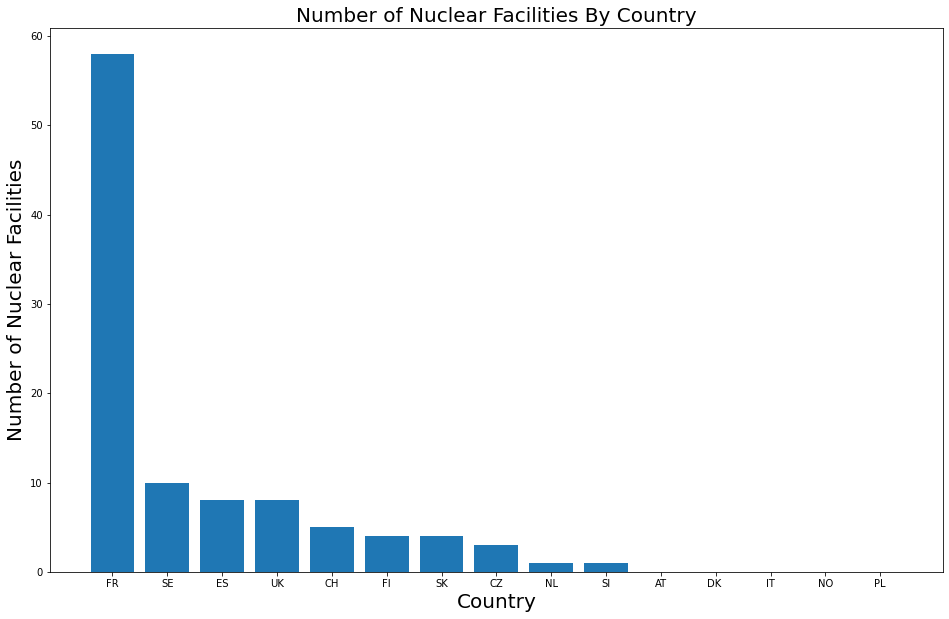

In [241]:
#Now, we have to sort and then plot the data in nukedf:
nukedf = nukedf.sort_values(ascending=False)
plt.figure(figsize=(16,10))    
plt.bar(nukedf.index,nukedf.values)
plt.xlabel("Country", fontsize=20)
plt.ylabel("Number of Nuclear Facilities", fontsize=20)
plt.title("Number of Nuclear Facilities By Country", fontsize=20)
#From this, it is also evident that there is actually a tie in countries with lowest amount of nuclear powerplants
#AT, DK, IT, NO, and PL all have 0 nuclear powerplants

In [266]:
#Part J:
#To figure out which countries have the most hydro capacity, we append a value of the capacity instead of 1 in the loop
#Note - since we actually use the index, we have to reset the indices of newdf before doing this
newdf.index = range(0,len(newdf.index))
hyd = []
for index, source in enumerate(newdf['energy_source']):
    if source == 'Hydro':
        hyd.append(newdf['capacity'][index])
    else:
        hyd.append(0)

#We can then aggregate the amounts of hydro capacity
newdf['hydro'] = hyd  
hydrodf = newdf.groupby("country")["hydro"].sum()
hydrodf

country
AT      8757.96000
CH     16674.75000
CZ      1130.00000
DK         0.00000
ES     19796.34273
FI      3201.07000
FR     15601.50000
IT     12489.18000
NL         0.00000
NO     12423.00000
PL      1706.00000
SE      4701.00000
SI      1233.81300
SK      2449.15000
UK      4362.17000
Name: hydro, dtype: float64

Text(0.5, 1.0, 'Hydro Capacity By Country')

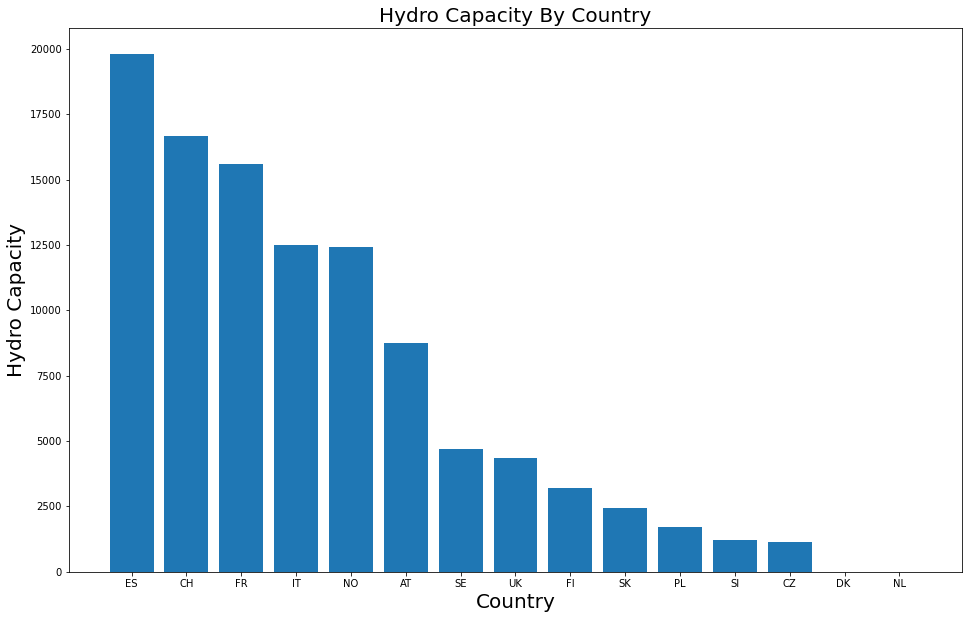

In [267]:
#Now, we have to sort and then plot the data in hydrodf:
hydrodf = hydrodf.sort_values(ascending=False)
plt.figure(figsize=(16,10))    
plt.bar(hydrodf.index,hydrodf.values)
plt.xlabel("Country", fontsize=20)
plt.ylabel("Hydro Capacity", fontsize=20)
plt.title("Hydro Capacity By Country", fontsize=20)
#From this, we can see that ES (Spain) has the most hydro capacity. Meanwhile, DK and NL have the least hydro capacity.

In [274]:
#Part K:
#Doing the same process as done in part J, but now with hard coal instead of hydro
cool = []
for index, source in enumerate(newdf['energy_source']):
    if source == 'Hard coal':
        cool.append(newdf['capacity'][index])
    else:
        cool.append(0)

#We can then aggregate the amounts of hydro capacity
newdf['hard coal'] = cool
coaldf = newdf.groupby("country")["hard coal"].sum()
coaldf

country
AT       469.000
CH         0.000
CZ         0.000
DK      1240.000
ES      6544.154
FI      2348.900
FR      2930.000
IT         0.000
NL      4011.000
NO         0.000
PL     15261.000
SE       130.000
SI         0.000
SK       440.000
UK     13915.000
Name: hard coal, dtype: float64

Text(0.5, 1.0, 'Hard Coal Capacity By Country')

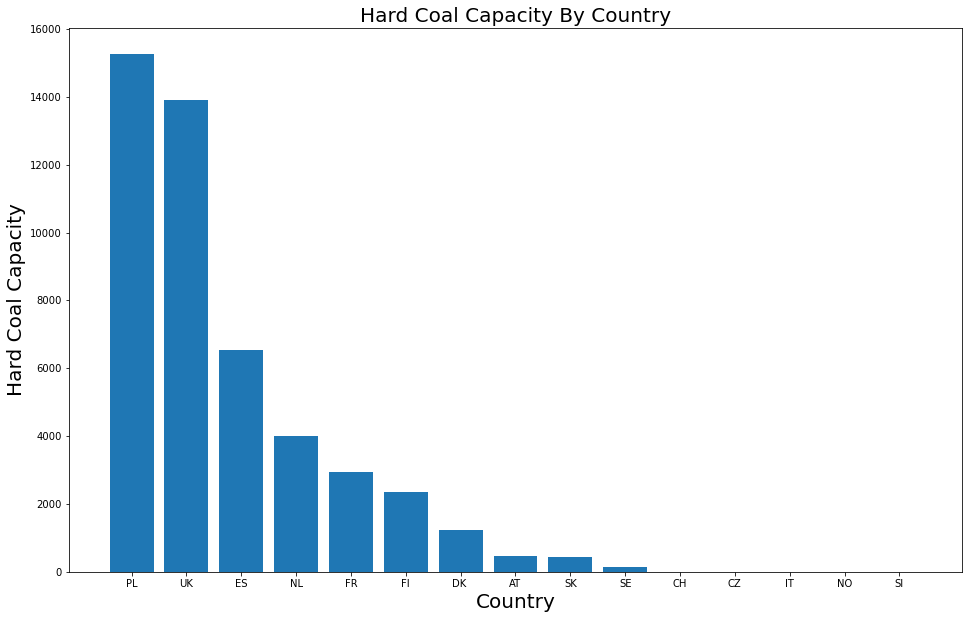

In [275]:
#Now, we plot in the same way
coaldf = coaldf.sort_values(ascending=False)
plt.figure(figsize=(16,10))    
plt.bar(coaldf.index,coaldf.values)
plt.xlabel("Country", fontsize=20)
plt.ylabel("Hard Coal Capacity", fontsize=20)
plt.title("Hard Coal Capacity By Country", fontsize=20)
#From this, we can see that PL (Poland) has the most emissions. Meanwhile, CH, CZ, IT, NO, and SL have the least emissions.

Text(0.5, 1.0, 'Facility Capacity Based on Lat and Lon')

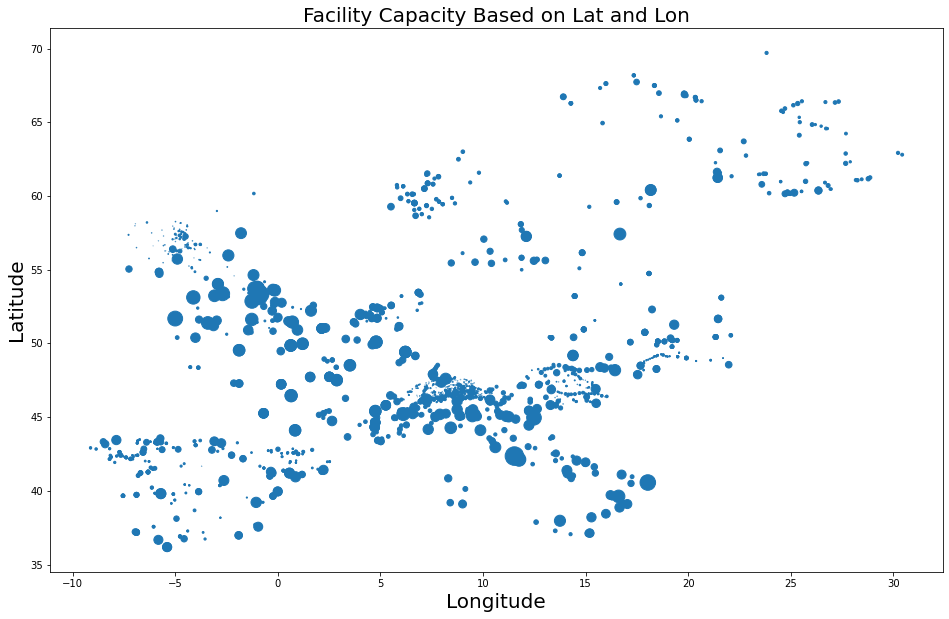

In [315]:
#Part L:
#Creating a plot of powerplant capacities 
#Assuming that x and y are based on latitude (y) and longitude (x), 
plt.figure(figsize=(16,10))    
plt.scatter(newdf['lon'],newdf['lat'],s=newdf['capacity']/10)
plt.xlabel("Longitude", fontsize=20)
plt.ylabel("Latitude", fontsize=20)
plt.title("Facility Capacity Based on Lat and Lon", fontsize=20)


Text(0.5, 1.0, 'Facility Capacity Based on Lat and Lon')

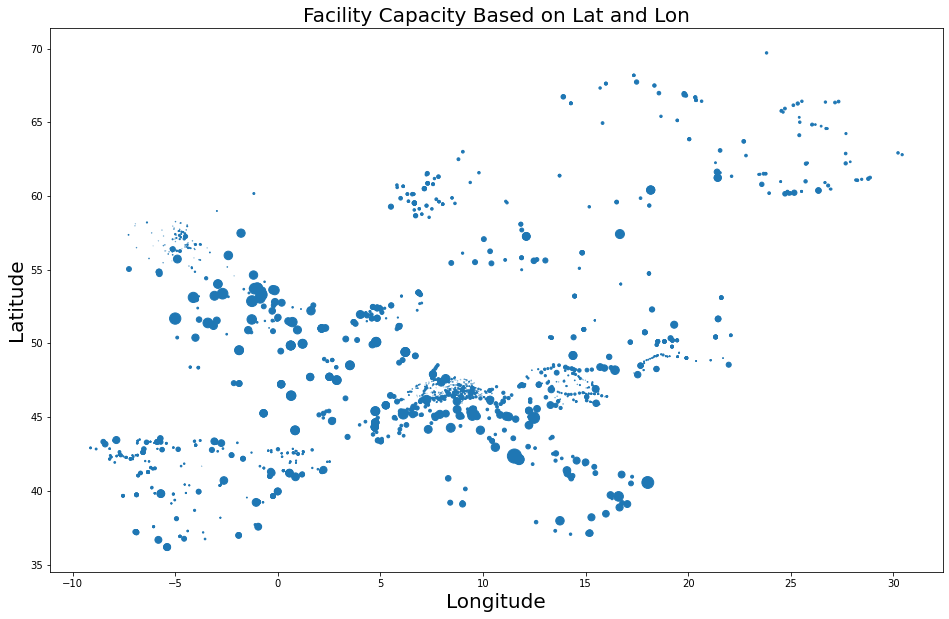

In [316]:
#Since the previous plot looks a little bit weird because of capacity sizes, capacity can also be normalized and then
#used as size
#normalizing capacity via min-max scaling:
newdf['capacity'] = (newdf['capacity'] - newdf['capacity'].min())/(newdf['capacity'].max()-newdf['capacity'].min())

plt.figure(figsize=(16,10))    
plt.scatter(newdf['lon'],newdf['lat'],s=newdf['capacity']*200)
plt.xlabel("Longitude", fontsize=20)
plt.ylabel("Latitude", fontsize=20)
plt.title("Facility Capacity Based on Lat and Lon", fontsize=20)
#Unfortunately, normalizing doesn't impact the look of the graph too much, but it was worth it to try